1. company name -> check if there are any spelling mistakes, duplicate names, upper lower etc.
2. check missing duplicate values in each column
3. check outliers for numeric values, there are no outliers in this dataset
4. as in all numeric values there shoul not be any -ve value we can check in whole data set.
5. string(one,two) to continuos variables
6. create generic function for dummy variables

In [1076]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

# rmse and r-square
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.2f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [1077]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [1078]:
# As per the problem statement variable name 'CarName'  comprised of two parts:
# first word is the name of 'car company' and the second is the 'car model'.
car['company'],car['model'] = car['CarName'].str.split(' ', 1).str

In [1079]:
car[['CarName','company','model']].sample(4)

,CarName,company,model
198,volvo 264gl,volvo,264gl
57,mazda rx-7 gs,mazda,rx-7 gs
82,mitsubishi outlander,mitsubishi,outlander
29,dodge coronet custom (sw),dodge,coronet custom (sw)


In [1080]:
# drop CarName column now
car.drop(labels=['CarName','model'],axis=1, inplace=True)

In [1081]:
# check if there are any null values
null_values =car.isnull().sum() 
null_values[null_values.values > 0]

Series([], dtype: int64)

In [1082]:
#numeric_data = car.select_dtypes(include=['number'])

In [1083]:
# data cleaning in company column
car.company.unique()
# mazda is mis-spelled as maxda
# toyota is mis-spelled as toyouta
# porsche is mis-spelled as porcshce
# volkswagen is mis-spelled as vokswagen
# volkswagen in short form written as vw
# Nissan & nissan considered as two differnt company

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [1084]:
car['company'] = car['company'].str.lower()
car['company'] = car.loc[:, 'company'].replace(['maxda', 'toyouta', 'porcshce','vokswagen','vw'], \
                              ['mazda', 'toyota', 'porsche','volkswagen','volkswagen'])

In [1085]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1086]:
categorical_cols = car.select_dtypes(include=['object'])
categorical_cols.nunique()

fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
company           22
dtype: int64

In [1087]:
# first convert categorical columns where there are only two distinct values to numeric(0 or 1)
car['fueltype'] = car['fueltype'].map({'gas':0, 'diesel':1})
car['aspiration'] = car['aspiration'].map({'std':0, 'turbo':1})
car['enginelocation'] = car['enginelocation'].map({'front':0, 'rear':1})
car['doornumber'] = car['doornumber'].map({'two':0, 'four':1})

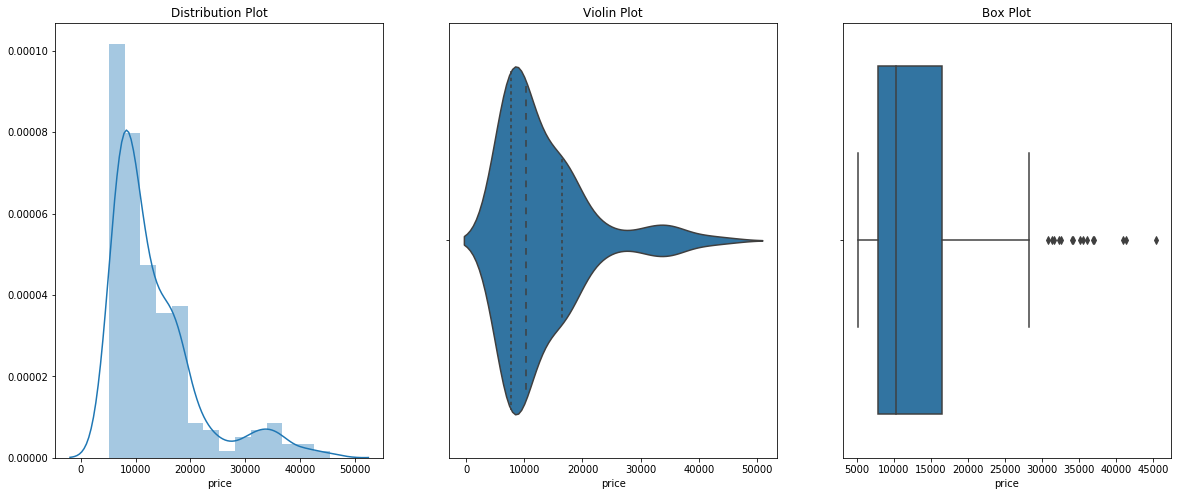

In [1088]:
# car Price Distribution
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(car['price'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(car['price'],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(car['price'],ax=ax[2])
#sns.boxplot(car['price'])

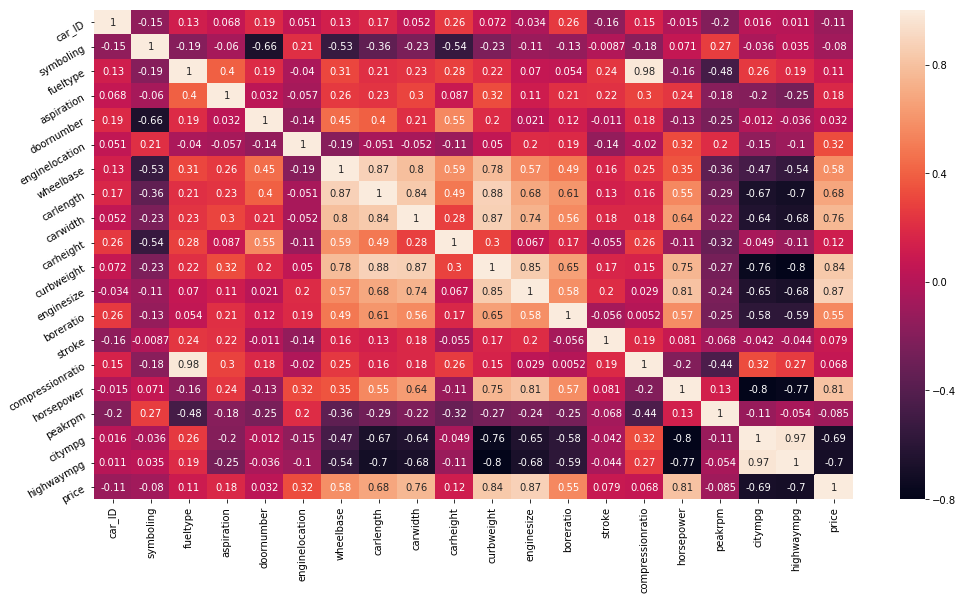

In [1089]:
corr = car.corr()
plt.figure(figsize=(17,9))
ax = sns.heatmap(corr, annot=True)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

#### Insights:
1. Price is more correlated with engine size and curb weight of the car
2. Curb weight is mostly correlated with car length & car width.
3. Wheel base is highly correlated with car length & car width.

In [1090]:
#car.select_dtypes(exclude=['number']).head()
# Alternatively we can use the below statement as well to get the categorical columns
#car.select_dtypes(include=['object']).head()

In [1091]:
#derived metrics


In [1092]:
car.sample(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
125,126,3,0,0,0,hatchback,rwd,0,94.50,168.90,68.30,50.20,2778,ohc,four,151,mpfi,3.94,3.11,9.50,143,5500,19,27,22018.00,porsche
175,176,-1,0,0,1,hatchback,fwd,0,102.40,175.60,66.50,53.90,2414,ohc,four,122,mpfi,3.31,3.54,8.70,92,4200,27,32,9988.00,toyota
89,90,1,0,0,0,sedan,fwd,0,94.50,165.30,63.80,54.50,1889,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,5499.00,nissan
69,70,0,1,1,0,hardtop,rwd,0,106.70,187.50,70.30,54.90,3495,ohc,five,183,idi,3.58,3.64,21.50,123,4350,22,25,28176.00,buick
107,108,0,0,0,1,sedan,rwd,0,107.90,186.70,68.40,56.70,3020,l,four,120,mpfi,3.46,3.19,8.40,97,5000,19,24,11900.00,peugeot


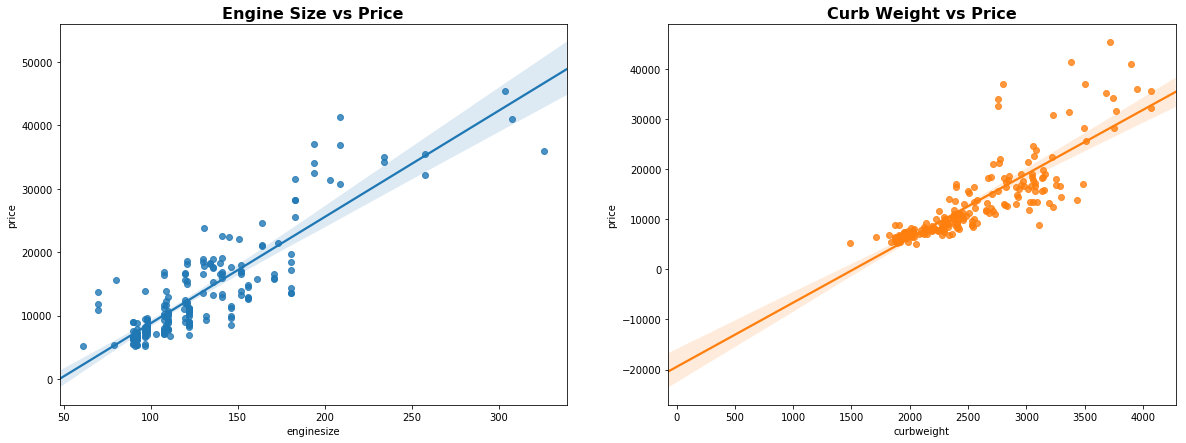

In [1093]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,7))
ax[0].set_title('Engine Size vs Price',fontsize=16,weight="bold")
sns.regplot(x='enginesize',y='price', data =car,ax=ax[0])
ax[1].set_title("Curb Weight vs Price",fontsize=16,weight="bold")
sns.regplot(x='curbweight',y='price', data =car,ax=ax[1])
plt.show()

### Bivariate Analysis

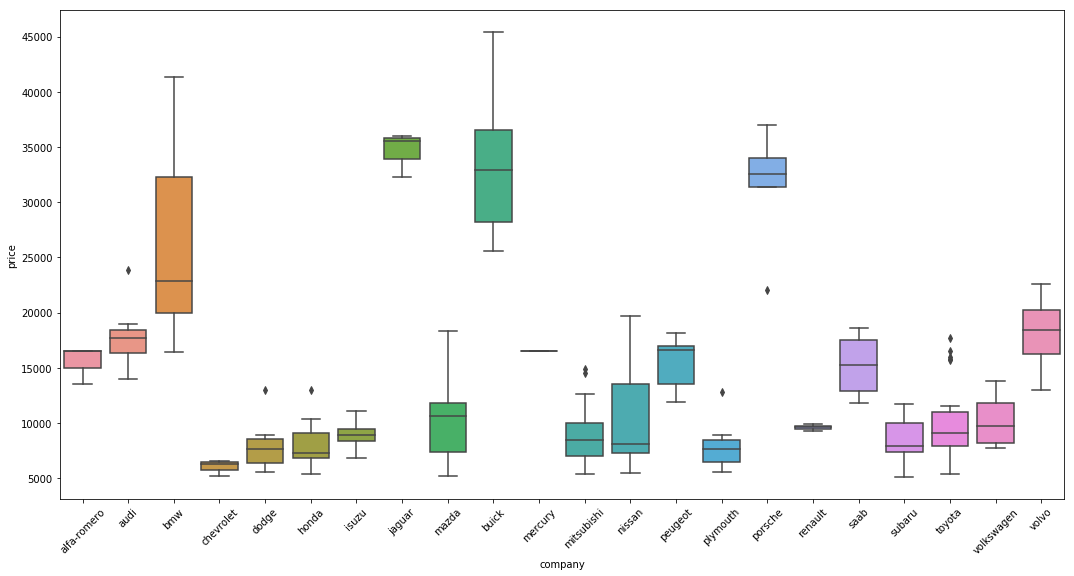

In [1094]:
# Price distribution of the cars company-wise
plt.figure(figsize=(18,9))
ax = sns.boxplot(x='company',y='price',data=car)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [1095]:
car.sample(10)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
51,52,1,0,0,0,hatchback,fwd,0,93.10,159.10,64.20,54.10,1900,ohc,four,91,2bbl,3.03,3.15,9.00,68,5000,31,38,6095.00,mazda
120,121,1,0,0,1,hatchback,fwd,0,93.70,157.30,63.80,50.60,1967,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6229.00,plymouth
129,130,1,0,0,0,hatchback,rwd,0,98.40,175.70,72.30,50.50,3366,dohcv,eight,203,mpfi,3.94,3.11,10.00,288,5750,17,28,31400.50,porsche
19,20,1,0,0,0,hatchback,fwd,0,94.50,155.90,63.60,52.00,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.00,chevrolet
102,103,0,0,0,1,wagon,fwd,0,100.40,184.60,66.50,56.10,3296,ohcv,six,181,mpfi,3.43,3.27,9.00,152,5200,17,22,14399.00,nissan
135,136,2,0,0,1,sedan,fwd,0,99.10,186.60,66.50,56.10,2758,ohc,four,121,mpfi,3.54,3.07,9.30,110,5250,21,28,15510.00,saab
202,203,-1,0,0,1,sedan,rwd,0,109.10,188.80,68.90,55.50,3012,ohcv,six,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485.00,volvo
24,25,1,0,0,1,hatchback,fwd,0,93.70,157.30,63.80,50.60,1967,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6229.00,dodge
73,74,0,0,0,1,sedan,rwd,0,120.90,208.10,71.70,56.70,3900,ohcv,eight,308,mpfi,3.80,3.35,8.00,184,4500,14,16,40960.00,buick
104,105,3,0,0,0,hatchback,rwd,0,91.30,170.70,67.90,49.70,3071,ohcv,six,181,mpfi,3.43,3.27,9.00,160,5200,19,25,17199.00,nissan


In [1096]:
categorical_cols = car.select_dtypes(include=['object'])
categorical_cols.nunique()

carbody            5
drivewheel         3
enginetype         7
cylindernumber     7
fuelsystem         8
company           22
dtype: int64

In [1097]:
def add_dummy(df,colname):
    """
    This function will convert the categorical column to continuos by adding dummy variables to the dataframe and 
    drop the original categorical column.
    df      :: dataframe
    colname :: name of categorical column
    """
    df_new = df.copy()
    dummy = pd.get_dummies(df_new[colname],drop_first=True)
    df_new = pd.concat([df_new,dummy],axis=1)
    df_new.drop(labels=colname,axis=1,inplace=True)
    print('Following columns has been added to the dataset:\n',dummy.columns.values)
    del dummy
    return df_new

In [1098]:
car = add_dummy(car,'carbody')

Following columns has been added to the dataset:
 ['hardtop' 'hatchback' 'sedan' 'wagon']


In [1099]:
car = add_dummy(car,'drivewheel')

Following columns has been added to the dataset:
 ['fwd' 'rwd']


In [1100]:
car = add_dummy(car,'enginetype')

Following columns has been added to the dataset:
 ['dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']


In [1101]:
car = add_dummy(car,'fuelsystem')

Following columns has been added to the dataset:
 ['2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi']


In [1102]:
car = add_dummy(car,'company')

Following columns has been added to the dataset:
 ['audi' 'bmw' 'buick' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche' 'renault'
 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [1103]:
car = add_dummy(car,'cylindernumber')

Following columns has been added to the dataset:
 ['five' 'four' 'six' 'three' 'twelve' 'two']


In [1104]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,five,four,six,three,twelve,two
0,1,3,0,0,0,0,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,3,0,0,0,0,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,0,0,0,0,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.00,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,2,0,0,1,0,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.00,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,2,0,0,1,0,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1105]:
car.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype='object')

In [1106]:
# Putting feature variable to X(remove car_ID & price)
X = car.loc[:, ~car.columns.isin(['car_ID','price'])]

# Putting target variable to y
y = car['price']

In [1107]:

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3)

In [1108]:
import statsmodels.api as sm          # Importing statsmodels
import statsmodels
#X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model

In [1109]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [1110]:
# save all numeric data into car_copy dataframe, we will use these data frame & iterativily remove insignificant columns 
#from this and finally build the model.
car_copy = car.select_dtypes(include=['number'])

In [1111]:
#use linear regression as the model
lr = LinearRegression()

In [1112]:
X.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,five,four,six,three,twelve,two
0,3,0,0,0,0,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3,0,0,0,0,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,0,0,1,0,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,0,0,1,0,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X.shape)
X_new = SelectKBest(chi2, k=30).fit_transform(X, y)
print(X_new.shape)

(205, 64)


ValueError: Input X must be non-negative.

In [1066]:
#rank all features, i.e continue the elimination until the last one
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank:")
sorted(list(zip(rfe.ranking_,X_train.columns)))

Features sorted by their rank:


[(1, 'four'),
 (2, 'boreratio'),
 (3, 'two'),
 (4, 'chevrolet'),
 (5, 'five'),
 (6, 'six'),
 (7, 'dohcv'),
 (8, 'subaru'),
 (9, 'renault'),
 (10, 'nissan'),
 (11, 'toyota'),
 (12, 'mazda'),
 (13, 'mitsubishi'),
 (14, 'dodge'),
 (15, 'isuzu'),
 (16, 'plymouth'),
 (17, 'honda'),
 (18, 'mercury'),
 (19, 'volkswagen'),
 (20, 'l'),
 (21, 'volvo'),
 (22, 'saab'),
 (23, 'rotor'),
 (24, 'enginelocation'),
 (25, 'porsche'),
 (26, 'audi'),
 (27, 'twelve'),
 (28, 'jaguar'),
 (29, 'aspiration'),
 (30, 'hatchback'),
 (31, 'sedan'),
 (32, 'hardtop'),
 (33, 'wagon'),
 (34, '4bbl'),
 (35, 'stroke'),
 (36, 'ohc'),
 (37, 'ohcv'),
 (38, 'mfi'),
 (39, 'carwidth'),
 (40, 'bmw'),
 (41, 'idi'),
 (42, 'peugeot'),
 (43, 'compressionratio'),
 (44, 'buick'),
 (45, 'spdi'),
 (46, 'mpfi'),
 (47, '2bbl'),
 (48, 'fueltype'),
 (49, 'ohcf'),
 (50, 'three'),
 (51, 'doornumber'),
 (52, 'symboling'),
 (53, 'rwd'),
 (54, 'fwd'),
 (55, 'carheight'),
 (56, 'enginesize'),
 (57, 'citympg'),
 (58, 'highwaympg'),
 (59, 'wheelba

In [1067]:
X_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'five',
       'four', 'six', 'three', 'twelve', 'two'],
      dtype='object')

In [1068]:
# Significance(p-value) is more important than multicollinearity(VIF value).
#So we will remove those features(one by one) which are having low significance(p-value > significant level).For multicollinearity
#we will check for VIF value(greater than 2.5-3) & parallely check for it's p-value , if it is greater than significant level we
#will remove that column and if p-value < significant level, we will keep that column.

#### Iteration 1

In [1017]:
#Let's see the summary of our first linear model
m1 = sm.OLS(y_train,X_train).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     183.6
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.58e-71
Time:                        15:42:03   Log-Likelihood:                -1236.4
No. Observations:                 143   AIC:                             2587.
Df Residuals:                      86   BIC:                             2756.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling         -306.4771    310.064     -0.988      0.326    -922.863     309.909
fueltype          6797.9333   4172.665      1.629      0.107   -1497.050    1.51e+04
aspiration         909.9667   1079.330      0.843      0.402   -1235.671    3055.604
doornumber        -215.9670    618.006     -0.349      0.728   -1444.523    1012.589
enginelocation    6766.8755   1690.819      4.002      0.000    3405.639    1.01e+04
wheelbase          335.9409    123.866      2.712      0.008      89.704     582.178
carlength         -233.5187     65.903     -3.543      0.001    -364.529    -102.508
carwidth           623.8984    248.478      2.511      0.014     129.940    1117.857
carheight         -452.0017    147.916     -3.056      0.003    -746.049    -157.955
curbweight           9.9476      2.618      3.799      0.000       4.743      15.152
enginesize         170.5423     46.240      3.688      0.000      78.621     262.464
boreratio        -1.496e+04   3558.350     -4.204      0.000    -2.2e+04   -7885.353
stroke           -2878.7052   1303.690     -2.208      0.030   -5470.355    -287.056
compressionratio  -683.4971    624.362     -1.095      0.277   -1924.688     557.693
horsepower           2.0334     39.052      0.052      0.959     -75.599      79.666
peakrpm              1.7393      0.934      1.862      0.066      -0.117       3.596
citympg           -295.5903    191.541     -1.543      0.126    -676.361      85.181
highwaympg         215.3507    143.168      1.504      0.136     -69.259     499.960
hardtop          -3521.0159   1424.001     -2.473      0.015   -6351.836    -690.196
hatchback        -3550.2398   1312.520     -2.705      0.008   -6159.443    -941.036
sedan            -2358.6448   1412.786     -1.669      0.099   -5167.171     449.881
wagon            -2711.3863   1498.374     -1.810      0.074   -5690.055     267.283
fwd               1193.6750   1154.499      1.034      0.304   -1101.394    3488.744
rwd               1719.5346   1432.320      1.201      0.233   -1127.823    4566.892
dohcv             2094.9144   4685.836      0.447      0.656   -7220.218    1.14e+04
l                 5462.0254   2459.097      2.221      0.029     573.502    1.04e+04
ohc               -205.1553   1478.065     -0.139      0.890   -3143.450    2733.140
ohcf              5147.4435   1268.652      4.057      0.000    2625.446    7669.441
ohcv             -2681.0269   1369.294     -1.958      0.053   -5403.094      41.040
rotor             9600.4342   3701.053      2.594      0.011    2242.984     1.7e+04
2bbl              5372.7744   2144.032      2.506      0.014    1110.581    9634.968
4bbl              3.939e-12   5.27e-12      0.748      0.457   -6.53e-12    1.44e-11
idi               6797.9333   4172.665      1.629      0.107   -1497.050    1.51e+04
mfi               3266.

In [1018]:
# Calculating Vif value
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
64,two,inf
26,l,inf
2,fueltype,inf
62,three,inf
55,subaru,inf
5,enginelocation,inf
50,peugeot,inf
33,idi,inf
30,rotor,inf
28,ohcf,inf


#### Iteration 2

In [779]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('rwd', axis =1)
car_copy = car_copy.drop('rwd', axis =1)

In [786]:
m2 = sm.OLS(y_train,X_train).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     48.18
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           4.90e-51
Time:                        17:15:05   Log-Likelihood:                -1296.1
No. Observations:                 143   AIC:                             2660.
Df Residuals:                     109   BIC:                             2761.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -5.02e+04   1.93e+04     -2.596      0.011   -8.85e+04   -1.19e+04
symboling          468.3459    298.007      1.572      0.119    -122.294    1058.986
fueltype          1.871e+04   4173.364      4.483      0.000    1.04e+04     2.7e+04
aspiration        1250.6415   1331.273      0.939      0.350   -1387.899    3889.182
doornumber         215.8161    389.189      0.555      0.580    -555.543     987.175
enginelocation    1.272e+04   2976.755      4.274      0.000    6821.880    1.86e+04
wheelbase          133.0248    128.829      1.033      0.304    -122.310     388.360
carlength           -8.3064     63.576     -0.131      0.896    -134.312     117.699
carwidth           677.1429    315.169      2.149      0.034      52.489    1301.797
carheight           92.2038    159.067      0.580      0.563    -223.062     407.470
curbweight           3.5661      2.151      1.658      0.100      -0.696       7.828
cylindernumber    1751.9322    862.211      2.032      0.045      43.058    3460.806
enginesize         110.6203     32.635      3.390      0.001      45.939     175.301
boreratio          -46.9310   2119.783     -0.022      0.982   -4248.273    4154.411
stroke           -5085.1776   1363.805     -3.729      0.000   -7788.194   -2382.161
compressionratio -2883.6686    618.383     -4.663      0.000   -4109.284   -1658.053
horsepower         -20.7930     30.087     -0.691      0.491     -80.425      38.839
peakrpm              2.4814      0.782      3.175      0.002       0.932       4.030
citympg             39.9998    207.123      0.193      0.847    -370.511     450.511
highwaympg         151.4738    198.510      0.763      0.447    -241.968     544.915
hardtop          -1705.7509   1750.576     -0.974      0.332   -5175.335    1763.833
hatchback        -3728.2616   1603.545     -2.325      0.022   -6906.435    -550.088
sedan            -2837.5457   1779.388     -1.595      0.114   -6364.235     689.143
wagon            -4096.0713   1991.040     -2.057      0.042   -8042.248    -149.894
fwd               -682.6642    778.205     -0.877      0.382   -2225.040     859.712
dohcv             2.783e-12    1.9e-12      1.466      0.145   -9.78e-13    6.54e-12
l                -5021.9761   1734.928     -2.895      0.005   -8460.547   -1583.405
ohc               1158.6645   1211.572      0.956      0.341   -1242.631    3559.960
ohcf             -1624.7888   2140.799     -0.759      0.450   -5867.784    2618.206
ohcv             -5504.1371   1906.622     -2.887      0.005   -9283.001   -1725.274
rotor             5363.6384   1721.878      3.115      0.002    1950.931    8776.346
2bbl              -982.3023   1136.267     -0.864      0.389   -3234.346    1269.742
4bbl              5363.6384   1721.878      3.115      0.002    1950.931    8776.346
idi               1.871

In [787]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
33,idi,inf
8,carwidth,6169.34
6,wheelbase,3509.55
7,carlength,3022.03
9,carheight,1373.38
13,boreratio,1037.58
15,compressionratio,942.56
10,curbweight,764.39
19,highwaympg,707.70


#### Iteration 3

In [788]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('boreratio', axis =1)
car_copy = car_copy.drop('boreratio', axis =1)

In [789]:
m3 = sm.OLS(y_train,X_train).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     50.14
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           6.84e-52
Time:                        17:19:48   Log-Likelihood:                -1296.1
No. Observations:                 143   AIC:                             2658.
Df Residuals:                     110   BIC:                             2756.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.031e+04   1.86e+04     -2.709      0.008   -8.71e+04   -1.35e+04
symboling          469.6301    290.976      1.614      0.109    -107.017    1046.277
fueltype          1.873e+04   4000.928      4.682      0.000    1.08e+04    2.67e+04
aspiration        1249.4418   1324.113      0.944      0.347   -1374.639    3873.522
doornumber         216.4915    386.225      0.561      0.576    -548.915     981.898
enginelocation    1.274e+04   2844.816      4.478      0.000    7102.396    1.84e+04
wheelbase          133.0452    128.239      1.037      0.302    -121.095     387.185
carlength           -8.4362     63.017     -0.134      0.894    -133.320     116.448
carwidth           677.4568    313.416      2.162      0.033      56.340    1298.574
carheight           92.0866    158.255      0.582      0.562    -221.538     405.711
curbweight           3.5677      2.140      1.668      0.098      -0.672       7.808
cylindernumber    1764.3375    652.339      2.705      0.008     471.555    3057.120
enginesize         110.3338     29.823      3.700      0.000      51.231     169.436
stroke           -5091.4125   1328.335     -3.833      0.000   -7723.861   -2458.965
compressionratio -2887.7065    588.185     -4.910      0.000   -4053.351   -1722.062
horsepower         -20.9451     29.159     -0.718      0.474     -78.731      36.841
peakrpm              2.4830      0.775      3.206      0.002       0.948       4.018
citympg             40.3097    205.708      0.196      0.845    -367.356     447.975
highwaympg         151.2616    197.376      0.766      0.445    -239.892     542.415
hardtop          -1699.4192   1719.192     -0.988      0.325   -5106.454    1707.616
hatchback        -3722.5765   1575.643     -2.363      0.020   -6845.131    -600.022
sedan            -2832.1499   1754.592     -1.614      0.109   -6309.339     645.039
wagon            -4089.4823   1959.707     -2.087      0.039   -7973.162    -205.803
fwd               -677.7314    742.232     -0.913      0.363   -2148.661     793.198
dohcv            -6.304e-12   1.61e-12     -3.915      0.000   -9.49e-12   -3.11e-12
l                -5030.5351   1683.605     -2.988      0.003   -8367.046   -1694.024
ohc               1155.6074   1198.196      0.964      0.337   -1218.936    3530.151
ohcf             -1650.2499   1797.450     -0.918      0.361   -5212.373    1911.873
ohcv             -5514.7008   1837.547     -3.001      0.003   -9156.288   -1873.113
rotor             5366.1091   1710.434      3.137      0.002    1976.430    8755.788
2bbl              -988.3079   1098.388     -0.900      0.370   -3165.056    1188.440
4bbl              5366.1091   1710.434      3.137      0.002    1976.430    8755.788
idi               1.873e+04   4000.928      4.682      0.000    1.08e+04    2.67e+04
mfi                    

In [790]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
32,idi,inf
8,carwidth,5590.74
6,wheelbase,3473.29
7,carlength,2990.64
9,carheight,1324.35
14,compressionratio,872.25
10,curbweight,712.74
18,highwaympg,699.14
17,citympg,580.46


#### Iteration 4

In [791]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('citympg', axis =1)
car_copy = car_copy.drop('citympg', axis =1)

In [792]:
m4 = sm.OLS(y_train,X_train).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     52.20
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           9.54e-53
Time:                        17:21:05   Log-Likelihood:                -1296.1
No. Observations:                 143   AIC:                             2656.
Df Residuals:                     111   BIC:                             2751.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.047e+04   1.85e+04     -2.732      0.007   -8.71e+04   -1.39e+04
symboling          456.8842    282.382      1.618      0.109    -102.674    1016.443
fueltype          1.856e+04   3889.060      4.773      0.000    1.09e+04    2.63e+04
aspiration        1316.7958   1273.171      1.034      0.303   -1206.078    3839.670
doornumber         198.4402    373.450      0.531      0.596    -541.575     938.456
enginelocation    1.271e+04   2827.600      4.494      0.000    7104.410    1.83e+04
wheelbase          134.7485    127.389      1.058      0.292    -117.681     387.178
carlength           -9.6959     62.416     -0.155      0.877    -133.377     113.985
carwidth           680.4689    311.680      2.183      0.031      62.854    1298.084
carheight           92.7328    157.534      0.589      0.557    -219.431     404.897
curbweight           3.5358      2.124      1.665      0.099      -0.673       7.745
cylindernumber    1769.6343    648.949      2.727      0.007     483.698    3055.570
enginesize         111.2984     29.286      3.800      0.000      53.265     169.331
stroke           -5077.1954   1320.594     -3.845      0.000   -7694.041   -2460.349
compressionratio -2865.1667    574.324     -4.989      0.000   -4003.229   -1727.104
horsepower         -22.6214     27.755     -0.815      0.417     -77.620      32.377
peakrpm              2.4739      0.770      3.214      0.002       0.948       3.999
highwaympg         185.1715     94.517      1.959      0.053      -2.120     372.463
hardtop          -1717.7737   1709.187     -1.005      0.317   -5104.641    1669.094
hatchback        -3732.7519   1567.951     -2.381      0.019   -6839.751    -625.753
sedan            -2835.9281   1746.870     -1.623      0.107   -6297.467     625.610
wagon            -4070.2075   1948.741     -2.089      0.039   -7931.768    -208.648
fwd               -696.8362    732.607     -0.951      0.344   -2148.545     754.873
dohcv             6.313e-12   1.41e-12      4.478      0.000    3.52e-12    9.11e-12
l                -5053.5109   1672.227     -3.022      0.003   -8367.140   -1739.881
ohc               1117.2194   1176.942      0.949      0.345   -1214.969    3449.408
ohcf             -1651.5362   1789.635     -0.923      0.358   -5197.817    1894.745
ohcv             -5526.1372   1828.648     -3.022      0.003   -9149.724   -1902.550
rotor             5332.5221   1694.437      3.147      0.002    1974.882    8690.162
2bbl             -1034.5788   1068.050     -0.969      0.335   -3150.992    1081.834
4bbl              5332.5221   1694.437      3.147      0.002    1974.882    8690.162
idi               1.856e+04   3889.060      4.773      0.000    1.09e+04    2.63e+04
mfi                       0          0        nan        nan           0           0
mpfi              -725.

In [793]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
31,idi,inf
2,fueltype,inf
8,carwidth,5586.04
6,wheelbase,3433.99
7,carlength,2914.17
9,carheight,1321.99
14,compressionratio,855.73
10,curbweight,705.37
16,peakrpm,380.22
12,enginesize,301.73


#### Iteration 5

In [794]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carlength', axis =1)
car_copy = car_copy.drop('carlength', axis =1)

In [795]:
m5 = sm.OLS(y_train,X_train).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     54.42
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           1.29e-53
Time:                        17:22:26   Log-Likelihood:                -1296.1
No. Observations:                 143   AIC:                             2654.
Df Residuals:                     112   BIC:                             2746.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.078e+04   1.83e+04     -2.777      0.006    -8.7e+04   -1.45e+04
symboling          449.5120    277.150      1.622      0.108     -99.625     998.650
fueltype          1.863e+04   3846.305      4.844      0.000     1.1e+04    2.63e+04
aspiration        1367.5081   1225.234      1.116      0.267   -1060.137    3795.153
doornumber         195.6357    371.384      0.527      0.599    -540.215     931.486
enginelocation    1.269e+04   2813.746      4.511      0.000    7118.033    1.83e+04
wheelbase          128.9162    121.199      1.064      0.290    -111.224     369.056
carwidth           669.6310    302.445      2.214      0.029      70.375    1268.887
carheight           92.5192    156.840      0.590      0.556    -218.239     403.278
curbweight           3.4351      2.014      1.706      0.091      -0.555       7.425
cylindernumber    1807.9244    597.695      3.025      0.003     623.668    2992.181
enginesize         110.7975     28.981      3.823      0.000      53.375     168.220
stroke           -5031.5768   1281.908     -3.925      0.000   -7571.513   -2491.640
compressionratio -2877.8935    565.969     -5.085      0.000   -3999.289   -1756.498
horsepower         -23.1609     27.417     -0.845      0.400     -77.483      31.161
peakrpm              2.4884      0.761      3.271      0.001       0.981       3.996
highwaympg         188.1517     92.145      2.042      0.044       5.578     370.726
hardtop          -1762.2529   1677.676     -1.050      0.296   -5086.353    1561.847
hatchback        -3772.6884   1539.978     -2.450      0.016   -6823.957    -721.419
sedan            -2920.5405   1652.536     -1.767      0.080   -6194.829     353.748
wagon            -4158.9470   1855.000     -2.242      0.027   -7834.392    -483.502
fwd               -725.3682    706.113     -1.027      0.307   -2124.441     673.704
dohcv             4.319e-12   1.88e-12      2.294      0.024    5.88e-13    8.05e-12
l                -5016.1717   1647.637     -3.044      0.003   -8280.752   -1751.591
ohc               1148.8382   1154.147      0.995      0.322   -1137.956    3435.632
ohcf             -1569.7372   1702.948     -0.922      0.359   -4943.909    1804.435
ohcv             -5469.2454   1783.777     -3.066      0.003   -9003.570   -1934.921
rotor             5376.4251   1663.407      3.232      0.002    2080.597    8672.253
2bbl             -1049.2852   1059.201     -0.991      0.324   -3147.957    1049.386
4bbl              5376.4251   1663.407      3.232      0.002    2080.597    8672.253
idi               1.863e+04   3846.305      4.844      0.000     1.1e+04    2.63e+04
mfi                       0          0        nan        nan           0           0
mpfi              -737.3379   1247.640     -0.591      0.556   -3209.376    1734.701
spdi             -4777.

In [796]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
30,idi,inf
2,fueltype,inf
7,carwidth,4773.43
6,wheelbase,3131.56
8,carheight,1299.16
13,compressionratio,844.45
9,curbweight,652.99
15,peakrpm,372.97
11,enginesize,301.73
12,stroke,275.92


#### Iteration 6

In [797]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('doornumber', axis =1)
car_copy = car_copy.drop('doornumber', axis =1)

In [798]:
m6 = sm.OLS(y_train,X_train).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     56.65
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           1.95e-54
Time:                        17:24:54   Log-Likelihood:                -1296.3
No. Observations:                 143   AIC:                             2653.
Df Residuals:                     113   BIC:                             2741.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                -5e+04   1.82e+04     -2.752      0.007    -8.6e+04    -1.4e+04
symboling          394.9568    256.250      1.541      0.126    -112.720     902.634
fueltype          1.845e+04   3819.082      4.832      0.000    1.09e+04     2.6e+04
aspiration        1300.6025   1214.732      1.071      0.287   -1106.000    3707.205
enginelocation    1.303e+04   2730.109      4.774      0.000    7623.909    1.84e+04
wheelbase          135.1769    120.229      1.124      0.263    -103.017     373.371
carwidth           665.5419    301.377      2.208      0.029      68.460    1262.624
carheight           81.3051    154.891      0.525      0.601    -225.562     388.172
curbweight           3.6792      1.953      1.883      0.062      -0.191       7.549
cylindernumber    1761.0945    589.154      2.989      0.003     593.873    2928.316
enginesize         108.7406     28.625      3.799      0.000      52.029     165.452
stroke           -5013.3651   1277.339     -3.925      0.000   -7544.003   -2482.727
compressionratio -2853.3833    562.247     -5.075      0.000   -3967.296   -1739.470
horsepower         -23.3184     27.327     -0.853      0.395     -77.458      30.822
peakrpm              2.4163      0.746      3.239      0.002       0.938       3.894
highwaympg         188.2793     91.850      2.050      0.043       6.308     370.250
hardtop          -1813.2791   1669.514     -1.086      0.280   -5120.888    1494.330
hatchback        -3794.6545   1534.484     -2.473      0.015   -6834.744    -754.565
sedan            -2761.3755   1619.477     -1.705      0.091   -5969.851     447.100
wagon            -3992.3840   1822.000     -2.191      0.030   -7602.094    -382.674
fwd               -622.3136    676.299     -0.920      0.359   -1962.183     717.556
dohcv             6.068e-12   1.44e-12      4.216      0.000    3.22e-12    8.92e-12
l                -5098.8628   1634.890     -3.119      0.002   -8337.875   -1859.851
ohc               1077.7951   1142.570      0.943      0.348   -1185.842    3341.432
ohcf             -1630.3799   1693.611     -0.963      0.338   -4985.730    1724.970
ohcv             -5398.4364   1773.009     -3.045      0.003   -8911.087   -1885.785
rotor             5295.6095   1651.014      3.207      0.002    2024.654    8566.565
2bbl             -1042.2388   1055.726     -0.987      0.326   -3133.821    1049.344
4bbl              5295.6095   1651.014      3.207      0.002    2024.654    8566.565
idi               1.845e+04   3819.082      4.832      0.000    1.09e+04     2.6e+04
mfi                       0          0        nan        nan           0           0
mpfi              -749.8082   1243.421     -0.603      0.548   -3213.249    1713.633
spdi             -4738.2496   1592.539     -2.975      0.004   -7893.358   -1583.142
spfi              -615.

In [799]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
29,idi,inf
6,carwidth,4729.94
5,wheelbase,3131.24
7,carheight,1299.14
12,compressionratio,844.45
8,curbweight,634.07
14,peakrpm,366.79
10,enginesize,299.52
11,stroke,275.84


#### Iteration 7

In [800]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carheight', axis =1)
car_copy = car_copy.drop('carheight', axis =1)

In [801]:
m7 = sm.OLS(y_train,X_train).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     59.04
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           2.87e-55
Time:                        17:26:05   Log-Likelihood:                -1296.4
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     114   BIC:                             2737.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.518e+04   1.56e+04     -2.892      0.005   -7.61e+04   -1.42e+04
symboling          412.7191    253.197      1.630      0.106     -88.863     914.301
fueltype          1.862e+04   3793.356      4.910      0.000    1.11e+04    2.61e+04
aspiration        1261.3588   1208.570      1.044      0.299   -1132.809    3655.527
enginelocation    1.338e+04   2639.787      5.069      0.000    8151.724    1.86e+04
wheelbase          162.7876    107.768      1.511      0.134     -50.699     376.275
carwidth           630.6615    293.025      2.152      0.033      50.182    1211.141
curbweight           3.9281      1.889      2.079      0.040       0.186       7.670
cylindernumber    1734.8015    585.153      2.965      0.004     575.618    2893.985
enginesize         105.9346     28.032      3.779      0.000      50.403     161.466
stroke           -5136.4640   1251.631     -4.104      0.000   -7615.935   -2656.993
compressionratio -2888.2934    556.523     -5.190      0.000   -3990.762   -1785.825
horsepower         -23.1934     27.239     -0.851      0.396     -77.154      30.767
peakrpm              2.3465      0.732      3.207      0.002       0.897       3.796
highwaympg         187.7677     91.552      2.051      0.043       6.403     369.132
hardtop          -1729.4154   1656.563     -1.044      0.299   -5011.055    1552.224
hatchback        -3770.5578   1528.916     -2.466      0.015   -6799.328    -741.787
sedan            -2675.4937   1606.063     -1.666      0.098   -5857.093     506.105
wagon            -3782.5741   1771.960     -2.135      0.035   -7292.813    -272.335
fwd               -563.5320    664.841     -0.848      0.398   -1880.576     753.512
dohcv             8.032e-12   2.24e-12      3.585      0.000    3.59e-12    1.25e-11
l                -5182.8219   1621.869     -3.196      0.002   -8395.732   -1969.912
ohc               1131.9091   1134.288      0.998      0.320   -1115.107    3378.925
ohcf             -1682.7800   1685.286     -0.999      0.320   -5021.319    1655.759
ohcv             -5280.2633   1753.061     -3.012      0.003   -8753.065   -1807.462
rotor             5093.1354   1600.214      3.183      0.002    1923.124    8263.147
2bbl             -1186.0517   1016.312     -1.167      0.246   -3199.358     827.254
4bbl              5093.1354   1600.214      3.183      0.002    1923.124    8263.147
idi               1.862e+04   3793.356      4.910      0.000    1.11e+04    2.61e+04
mfi                       0          0        nan        nan           0           0
mpfi              -887.7214   1211.479     -0.733      0.465   -3287.651    1512.209
spdi             -5051.4135   1471.870     -3.432      0.001   -7967.176   -2135.651
spfi              -920.7683   2650.710     -0.347      0.729   -6171.804    4330.267
=======================

In [802]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
28,idi,inf
6,carwidth,4517.54
5,wheelbase,2585.13
11,compressionratio,844.16
7,curbweight,633.07
13,peakrpm,365.08
9,enginesize,280.12
10,stroke,275.39
12,horsepower,178.37


#### Iteration 8

In [803]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('fwd', axis =1)
car_copy = car_copy.drop('fwd', axis =1)

In [804]:
m8 = sm.OLS(y_train,X_train).fit()
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     61.35
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           5.15e-56
Time:                        17:27:49   Log-Likelihood:                -1296.9
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     115   BIC:                             2733.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.271e+04   1.53e+04     -2.786      0.006   -7.31e+04   -1.23e+04
symboling          372.5854    248.426      1.500      0.136    -119.499     864.670
fueltype          1.857e+04   3788.238      4.903      0.000    1.11e+04    2.61e+04
aspiration        1228.2107   1206.458      1.018      0.311   -1161.550    3617.971
enginelocation    1.348e+04   2633.995      5.118      0.000    8262.230    1.87e+04
wheelbase          158.3677    107.510      1.473      0.143     -54.588     371.324
carwidth           589.6157    288.642      2.043      0.043      17.872    1161.359
curbweight           4.3725      1.813      2.412      0.017       0.782       7.963
cylindernumber    1681.9952    581.115      2.894      0.005     530.919    2833.071
enginesize         108.6530     27.814      3.906      0.000      53.559     163.747
stroke           -5330.9608   1228.910     -4.338      0.000   -7765.195   -2896.726
compressionratio -2877.1948    555.688     -5.178      0.000   -3977.905   -1776.485
horsepower         -23.9997     27.189     -0.883      0.379     -77.856      29.857
peakrpm              2.3549      0.731      3.223      0.002       0.908       3.802
highwaympg         181.3505     91.127      1.990      0.049       0.845     361.856
hardtop          -1686.7291   1653.770     -1.020      0.310   -4962.528    1589.070
hatchback        -3815.1322   1526.140     -2.500      0.014   -6838.121    -792.143
sedan            -2762.2119   1600.838     -1.725      0.087   -5933.164     408.740
wagon            -3939.6607   1760.083     -2.238      0.027   -7426.047    -453.274
dohcv             9.739e-12   2.19e-12      4.453      0.000    5.41e-12    1.41e-11
l                -5075.9246   1614.978     -3.143      0.002   -8274.884   -1876.965
ohc               1081.6203   1131.348      0.956      0.341   -1159.363    3322.603
ohcf             -1818.3140   1675.629     -1.085      0.280   -5137.412    1500.784
ohcv             -5537.7961   1724.417     -3.211      0.002   -8953.534   -2122.058
rotor             5282.7453   1582.561      3.338      0.001    2147.997    8417.493
2bbl             -1153.6560   1014.349     -1.137      0.258   -3162.886     855.574
4bbl              5282.7453   1582.561      3.338      0.001    2147.997    8417.493
idi               1.857e+04   3788.238      4.903      0.000    1.11e+04    2.61e+04
mfi                       0          0        nan        nan           0           0
mpfi              -869.4035   1209.802     -0.719      0.474   -3265.789    1526.982
spdi             -5116.5994   1468.059     -3.485      0.001   -8024.541   -2208.658
spfi              -698.3325   2634.457     -0.265      0.791   -5916.684    4520.019
==============================================================================
Omnibus:                     

In [805]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
27,idi,inf
6,carwidth,4427.75
5,wheelbase,2584.36
11,compressionratio,842.32
7,curbweight,585.80
13,peakrpm,364.28
9,enginesize,279.74
10,stroke,269.80
12,horsepower,176.75


#### Iteration 9

In [806]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('horsepower', axis =1)
car_copy = car_copy.drop('horsepower', axis =1)

In [807]:
m9 = sm.OLS(y_train,X_train).fit()
m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           9.33e-57
Time:                        17:30:09   Log-Likelihood:                -1297.4
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     116   BIC:                             2729.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.401e+04   1.52e+04     -2.887      0.005   -7.42e+04   -1.38e+04
symboling          419.5983    242.419      1.731      0.086     -60.542     899.739
fueltype          1.891e+04   3764.835      5.024      0.000    1.15e+04    2.64e+04
aspiration         513.5192    893.560      0.575      0.567   -1256.290    2283.328
enginelocation     1.24e+04   2332.824      5.317      0.000    7783.385     1.7e+04
wheelbase          189.4599    101.479      1.867      0.064     -11.531     390.451
carwidth           587.0231    288.352      2.036      0.044      15.906    1158.140
curbweight           4.0862      1.782      2.294      0.024       0.558       7.615
cylindernumber    1661.2512    580.086      2.864      0.005     512.318    2810.185
enginesize          93.7199     22.056      4.249      0.000      50.035     137.405
stroke           -5254.4566   1224.682     -4.290      0.000   -7680.094   -2828.819
compressionratio -2897.1650    554.698     -5.223      0.000   -3995.814   -1798.516
peakrpm              2.1049      0.673      3.128      0.002       0.772       3.438
highwaympg         189.4870     90.573      2.092      0.039      10.095     368.879
hardtop          -1927.9751   1629.476     -1.183      0.239   -5155.358    1299.408
hatchback        -4294.0382   1425.085     -3.013      0.003   -7116.599   -1471.478
sedan            -3229.9110   1509.170     -2.140      0.034   -6219.012    -240.811
wagon            -4348.8614   1696.319     -2.564      0.012   -7708.634    -989.089
dohcv            -8.564e-12   2.55e-12     -3.361      0.001   -1.36e-11   -3.52e-12
l                -4632.3262   1533.333     -3.021      0.003   -7669.286   -1595.367
ohc               1408.6561   1067.944      1.319      0.190    -706.542    3523.854
ohcf             -1495.2629   1633.615     -0.915      0.362   -4730.843    1740.317
ohcv             -4930.1664   1579.553     -3.121      0.002   -8058.669   -1801.664
rotor             5002.1241   1548.823      3.230      0.002    1934.485    8069.763
2bbl             -1196.5289   1012.220     -1.182      0.240   -3201.359     808.301
4bbl              5002.1241   1548.823      3.230      0.002    1934.485    8069.763
idi               1.891e+04   3764.835      5.024      0.000    1.15e+04    2.64e+04
mfi                       0          0        nan        nan           0           0
mpfi             -1326.9763   1092.074     -1.215      0.227   -3489.967     836.015
spdi             -5253.3659   1458.469     -3.602      0.000   -8142.048   -2364.684
spfi              -725.0371   2631.774     -0.275      0.783   -5937.598    4487.523
==============================================================================
Omnibus:                       42.423   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.0

In [808]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
26,idi,inf
6,carwidth,4388.65
5,wheelbase,2330.95
11,compressionratio,839.25
7,curbweight,551.50
12,peakrpm,319.94
10,stroke,267.07
9,enginesize,210.96
8,cylindernumber,159.31


#### Iteration 10

In [809]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('aspiration', axis =1)
car_copy = car_copy.drop('aspiration', axis =1)

In [810]:
m10 = sm.OLS(y_train,X_train).fit()
m10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     66.72
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           1.33e-57
Time:                        17:31:27   Log-Likelihood:                -1297.6
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     117   BIC:                             2724.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.419e+04   1.52e+04     -2.908      0.004   -7.43e+04   -1.41e+04
symboling          425.4966    241.507      1.762      0.081     -52.795     903.789
fueltype          1.973e+04   3474.057      5.681      0.000    1.29e+04    2.66e+04
enginelocation    1.252e+04   2317.968      5.400      0.000    7925.483    1.71e+04
wheelbase          181.3881    100.214      1.810      0.073     -17.080     379.856
carwidth           618.8622    282.168      2.193      0.030      60.042    1177.682
curbweight           4.2144      1.762      2.391      0.018       0.724       7.705
cylindernumber    1648.0855    577.972      2.851      0.005     503.442    2792.729
enginesize          92.3853     21.871      4.224      0.000      49.071     135.699
stroke           -5326.6301   1214.734     -4.385      0.000   -7732.348   -2920.912
compressionratio -3004.4409    520.849     -5.768      0.000   -4035.954   -1972.928
peakrpm              2.1298      0.670      3.181      0.002       0.804       3.456
highwaympg         185.5750     90.058      2.061      0.042       7.219     363.931
hardtop          -1775.8947   1603.236     -1.108      0.270   -4951.019    1399.230
hatchback        -4133.3123   1393.367     -2.966      0.004   -6892.803   -1373.822
sedan            -3072.7130   1479.920     -2.076      0.040   -6003.616    -141.810
wagon            -4205.6363   1673.102     -2.514      0.013   -7519.126    -892.146
dohcv            -3.822e-12   9.45e-13     -4.044      0.000   -5.69e-12   -1.95e-12
l                -4734.9878   1518.527     -3.118      0.002   -7742.350   -1727.625
ohc               1312.6015   1051.760      1.248      0.215    -770.354    3395.557
ohcf             -1666.3971   1601.640     -1.040      0.300   -4838.362    1505.568
ohcv             -5090.3808   1550.299     -3.283      0.001   -8160.668   -2020.094
rotor             4843.9542   1519.804      3.187      0.002    1834.061    7853.847
2bbl             -1208.8955   1009.091     -1.198      0.233   -3207.348     789.557
4bbl              4843.9542   1519.804      3.187      0.002    1834.061    7853.847
idi               1.973e+04   3474.057      5.681      0.000    1.29e+04    2.66e+04
mfi                       0          0        nan        nan           0           0
mpfi             -1386.1398   1084.095     -1.279      0.204   -3533.133     760.853
spdi             -5082.5422   1423.765     -3.570      0.001   -7902.234   -2262.850
spfi              -846.4292   2615.765     -0.324      0.747   -6026.814    4333.956
==============================================================================
Omnibus:                       39.909   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.430
Skew:                           0.978   P

In [811]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
25,idi,inf
5,carwidth,4240.60
4,wheelbase,2297.28
10,compressionratio,742.58
6,curbweight,532.95
11,peakrpm,318.71
9,stroke,267.01
8,enginesize,197.13
7,cylindernumber,158.17


#### Iteration 11

In [812]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('ohcv', axis =1)
car_copy = car_copy.drop('ohcv', axis =1)

In [813]:
m11 = sm.OLS(y_train,X_train).fit()
m11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     63.76
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           2.64e-56
Time:                        17:32:33   Log-Likelihood:                -1303.9
No. Observations:                 143   AIC:                             2658.
Df Residuals:                     118   BIC:                             2732.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.996e+04   1.58e+04     -2.536      0.013   -7.12e+04   -8754.476
symboling          459.4048    251.087      1.830      0.070     -37.817     956.626
fueltype          1.782e+04   3563.936      5.000      0.000    1.08e+04    2.49e+04
enginelocation    1.325e+04   2400.909      5.518      0.000    8494.768     1.8e+04
wheelbase          217.7528    103.646      2.101      0.038      12.506     423.000
carwidth           428.5427    287.368      1.491      0.139    -140.525     997.610
curbweight           5.1673      1.809      2.856      0.005       1.585       8.750
cylindernumber    1214.3890    585.534      2.074      0.040      54.873    2373.905
enginesize          79.0197     22.362      3.534      0.001      34.738     123.302
stroke           -4730.5910   1249.884     -3.785      0.000   -7205.702   -2255.480
compressionratio -2675.8940    531.910     -5.031      0.000   -3729.221   -1622.567
peakrpm              2.2076      0.696      3.170      0.002       0.829       3.587
highwaympg         159.3987     93.349      1.708      0.090     -25.457     344.254
hardtop          -2197.1551   1663.010     -1.321      0.189   -5490.368    1096.058
hatchback        -4559.6255   1443.659     -3.158      0.002   -7418.463   -1700.789
sedan            -3623.5520   1530.109     -2.368      0.020   -6653.584    -593.521
wagon            -5065.1072   1719.625     -2.945      0.004   -8470.433   -1659.781
dohcv            -7.369e-12   1.28e-12     -5.742      0.000   -9.91e-12   -4.83e-12
l                -3449.5052   1526.790     -2.259      0.026   -6472.966    -426.045
ohc               2829.1219    983.308      2.877      0.005     881.905    4776.339
ohcf               270.4923   1549.541      0.175      0.862   -2798.021    3339.006
rotor             4729.5458   1581.124      2.991      0.003    1598.489    7860.603
2bbl             -1024.4688   1048.453     -0.977      0.331   -3100.692    1051.754
4bbl              4729.5458   1581.124      2.991      0.003    1598.489    7860.603
idi               1.782e+04   3563.936      5.000      0.000    1.08e+04    2.49e+04
mfi                       0          0        nan        nan           0           0
mpfi             -1094.0415   1124.327     -0.973      0.333   -3320.516    1132.433
spdi             -4698.5829   1476.594     -3.182      0.002   -7622.641   -1774.525
spfi             -1178.0242   2719.990     -0.433      0.666   -6564.345    4208.297
==============================================================================
Omnibus:                       56.311   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.918
Skew:                           1.331   Prob(JB):                     3.63e-57
Kurtosis:                       9.044   Cond. N

In [814]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
24,idi,inf
5,carwidth,3839.82
4,wheelbase,2138.47
10,compressionratio,724.82
6,curbweight,518.73
11,peakrpm,318.01
9,stroke,258.36
8,enginesize,192.80
12,highwaympg,152.13


#### Iteration 12

In [815]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('2bbl', axis =1)
car_copy = car_copy.drop('2bbl', axis =1)

In [816]:
m12 = sm.OLS(y_train,X_train).fit()
m12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     66.52
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           5.11e-57
Time:                        17:33:38   Log-Likelihood:                -1304.5
No. Observations:                 143   AIC:                             2657.
Df Residuals:                     119   BIC:                             2728.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.386e+04   1.52e+04     -2.878      0.005    -7.4e+04   -1.37e+04
symboling          409.4517    245.781      1.666      0.098     -77.220     896.123
fueltype          1.804e+04   3556.322      5.072      0.000     1.1e+04    2.51e+04
enginelocation    1.282e+04   2359.366      5.432      0.000    8145.246    1.75e+04
wheelbase          210.7901    103.381      2.039      0.044       6.085     415.495
carwidth           434.6172    287.247      1.513      0.133    -134.160    1003.394
curbweight           5.2287      1.808      2.893      0.005       1.649       8.808
cylindernumber    1217.2606    585.415      2.079      0.040      58.080    2376.441
enginesize          79.7264     22.346      3.568      0.001      35.480     123.973
stroke           -4336.1922   1182.692     -3.666      0.000   -6678.040   -1994.345
compressionratio -2637.2624    530.338     -4.973      0.000   -3687.385   -1587.140
peakrpm              2.5118      0.623      4.033      0.000       1.279       3.745
highwaympg         161.8130     93.298      1.734      0.085     -22.927     346.553
hardtop          -2368.3072   1653.446     -1.432      0.155   -5642.295     905.681
hatchback        -4656.5221   1439.975     -3.234      0.002   -7507.816   -1805.228
sedan            -3849.6296   1512.227     -2.546      0.012   -6843.990    -855.269
wagon            -5319.9609   1699.407     -3.130      0.002   -8684.957   -1954.965
dohcv            -5.902e-12    2.5e-12     -2.364      0.020   -1.08e-11   -9.58e-13
l                -3276.7952   1516.236     -2.161      0.033   -6279.095    -274.496
ohc               2865.5031    982.416      2.917      0.004     920.221    4810.785
ohcf               547.7418   1523.052      0.360      0.720   -2468.054    3563.537
rotor             5071.1021   1541.708      3.289      0.001    2018.366    8123.838
4bbl              5071.1021   1541.708      3.289      0.001    2018.366    8123.838
idi               1.804e+04   3556.322      5.072      0.000     1.1e+04    2.51e+04
mfi                       0          0        nan        nan           0           0
mpfi              -236.2538    702.331     -0.336      0.737   -1626.939    1154.431
spdi             -3987.3930   1284.504     -3.104      0.002   -6530.840   -1443.946
spfi              -328.1319   2576.682     -0.127      0.899   -5430.219    4773.955
==============================================================================
Omnibus:                       53.271   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.192
Skew:                           1.275   Prob(JB):                     2.81e-50
Kurtosis:                       8.639   Cond. No.                     1.00e+16
=====================================================

In [817]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
23,idi,inf
5,carwidth,3692.21
4,wheelbase,2129.16
10,compressionratio,720.97
6,curbweight,518.33
11,peakrpm,280.95
9,stroke,250.77
8,enginesize,191.91
12,highwaympg,151.54


In [1072]:
# Making predictions
y_pred = m1.predict(X_test)

In [1073]:
# computing rmse and r^2
mse = mean_squared_error(y_test,y_pred)
print(mse)
r_square = r2_score(y_test,y_pred)
print(r_square)

1996762.52374
0.953823826397


In [635]:
#Backward Elimination with p-values only:

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 


In [636]:
#Backward Elimination with p-values and Adjusted R Squared:

import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x

In [ ]:
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)